## Data Loading and Cleaning
Once the dataset is opened, it needs to be reviewed in order to understand the structure of both the data and the quality of the data.
Any row lacking a product description will be dropped (since it cannot be analysed meaningfully).
Any transaction (or row) with a negative or zero quantity or price will be dropped in order to consider valid values.

To perform the time-based analysis and to create an additional variable, `TotalRevenue`, two columns (`Quantity`and`Unit Price`) are multipled together. The Invoice Date column will also be converted to a datetime format for the purpose of further time-based analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data
df = pd.read_csv("online_retail.csv")
df.head()

df.shape
df.info()
df.describe()
df.isna().sum()

df_clean = df.dropna(subset=["Description"])
df_clean.shape

df_clean = df_clean[(df_clean["Quantity"] > 0) & (df_clean["UnitPrice"] > 0)]
df_clean.shape

df_clean["TotalRevenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]
df_clean[["Quantity", "UnitPrice", "TotalRevenue"]].head()

df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])
df_clean.dtypes
df_clean




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Analysis

### Top products by revenue
This section examines which products generate the highest total revenue.

In [2]:
top_products = (
    df_clean
    .groupby("Description")["TotalRevenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products


,TotalRevenue
Description,
DOTCOM POSTAGE,206248.77
REGENCY CAKESTAND 3 TIER,174484.74
WHITE HANGING HEART T-LIGHT HOLDER,106292.77
PARTY BUNTING,99504.33
JUMBO BAG RED RETROSPOT,94340.05
MEDIUM CERAMIC TOP STORAGE JAR,81700.92
Manual,78112.82
POSTAGE,78101.88
RABBIT NIGHT LIGHT,66964.99


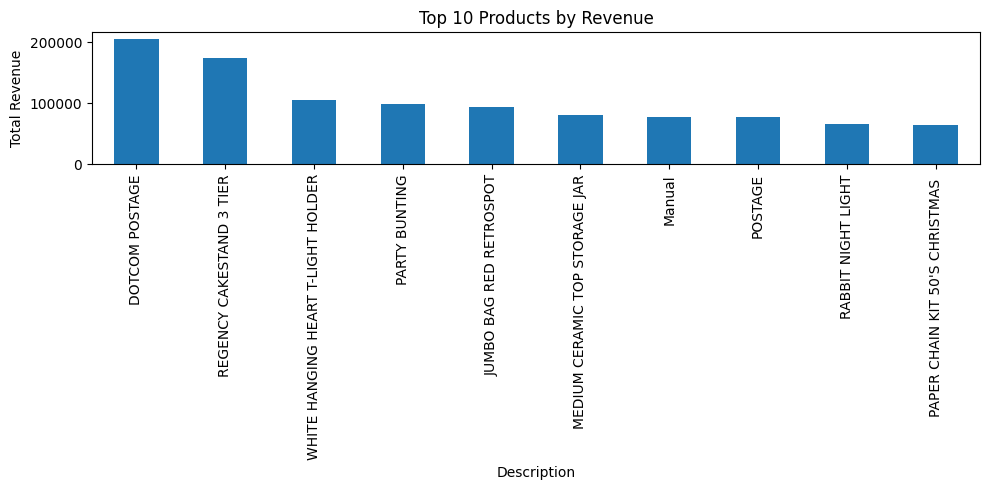

In [3]:
plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### Top Products by revenue - conclusions

The revenue generated by the top products indicates a fairly equal distribution between all of the products generating revenue on a national level. There is no product generating most of the sales.

Most of the revenue-generating products are inexpensive, decorative or gift items and therefore, the business model shows a preference for frequent purchases as opposed to fewer expensive purchases.

In addition, the presence of many non-product items such as DOTCOM POSTAGE and POSTAGE indicates that charges related to shipping contribute to a significant part of the total revenues.

### Revenue by Country
This section analyzes how total revenue is distributed across countries.




In [4]:
top_countries = (
    df_clean
    .groupby("Country")["TotalRevenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_countries


,TotalRevenue
Country,
United Kingdom,8798800.674
Netherlands,284023.860
EIRE,281812.620
Germany,227910.710
France,209381.760
Australia,136737.750
Spain,61419.790
Switzerland,56868.380
Belgium,41014.360


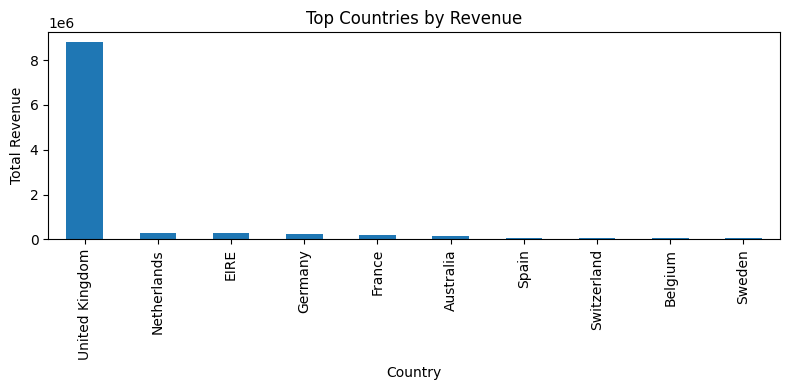

In [5]:
plt.figure(figsize=(8,4))
top_countries.plot(kind="bar")
plt.title("Top Countries by Revenue")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


### Countries- conclusion
The Revenue is dominated by UK, which is expected given the dataset.


## Monthly Revenue
This section explores how total revenue evolves over time.

In [6]:
df_clean["YearMonth"] = df_clean["InvoiceDate"].dt.to_period("M")
monthly_revenue = (
    df_clean
    .groupby("YearMonth")["TotalRevenue"]
    .sum()
    .sort_index()
)
monthly_revenue


,TotalRevenue
YearMonth,
2010-12,817516.690
2011-01,684856.350
2011-02,518157.750
2011-03,712377.030
2011-04,532901.341
2011-05,764670.670
2011-06,756666.360
2011-07,714531.351
2011-08,755332.970


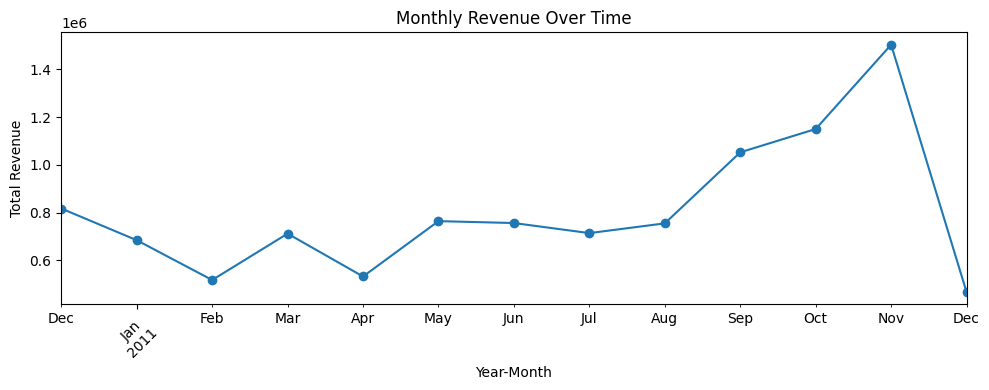

In [7]:
plt.figure(figsize=(10,4))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Over Time")
plt.ylabel("Total Revenue")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Monthly revenue - conclusions

Revenues are generally very stable between May and August and have "loud" increases starting September.
November produces the largest amount of revenue (this indicates high consumer demand during the pre-holiday season)

the revenue decline in December was likely due to missing data for that month and thus not indicative of any real decrease in overall demand for this month.

### Recap
This project did an analysis of transactions on an online retailer's website (found from kaggle) to identify key factors driving revenue, where sales are occurring, and when they are occurring most frequently.

findings show that there is a very even distribution of revenue across all product types, with a few exceptions having large shares of total revenue (eight products accounted for 48% of all revenue), but not the majority of total revenue. there is some extreme concentration on sales by country, with more than 60% of sales occurring in the UK and based on revenues, there are very identifiable seasonal trends, with the highest sales occurring prior to a major holiday.

These insights can be useful in making future decisions related to optimizing product portfolios, diversifying markets, and planning for seasonal sales spikes.